# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

In [1]:
# Your solution is here

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

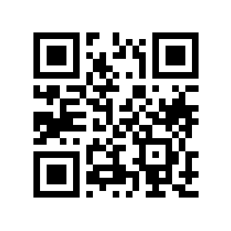

In [1]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [ ]:
def T_matvec(x, aplha):
    pass

# T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# your code is here

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [ ]:
# your code is here

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [ ]:
# your code is here

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [ ]:
def T_lmbda_matvec(x, aplha, lmbda):
    pass

# your code is here

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
def C_inv_matvec(x, alpha, lmbda):
    pass

# your code is here